In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

<h3>Simulating Blackjack Games</h3>
Each game will be won with 51% probability. We can simulate this using binomial distribution, which is parameterized with the number of
trials we perform (games), and the chance of each trial succeeding.

First we'll sumulate 1000 different universes in which you walk into the casino and play one game.

In [3]:
universes = 1000
results = np.zeros((universes, 1))
for i in range(universes):
    results[i] = np.random.binomial(n = 1, p = 0.51)

#checking the mean and standard deviation of the results
np.mean(results), np.std(results)

(0.501, 0.499998999999)

<h3> Now we simulate 100 games </h3>

In [4]:
universes = 1000
results = np.zeros((universes, 1))
for i in range(universes):
    results[i] = np.random.binomial(n = 100, p = 0.51)

#checking the mean and standard deviation of the results
np.mean(results), np.std(results)

(50.943, 5.07481536609954)

<h3> Case 1: Investing in Few Assets</h3>

lets simulate some assets by sampling from normal distrubtion 

NOTE: In practice real financial assets returns rarely are normally distributed, so this is not a great assumption. However it's okay here to get 
our point across becasue we are just concerned with correlation and level of VOL

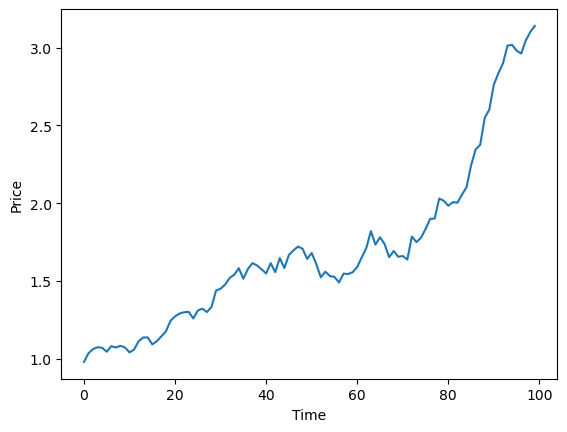

In [6]:
R_1 = np.random.normal(1.01,0.03,100)
A_1 = np.cumprod(R_1)
P = A_1
plt.plot(P)
plt.xlabel("Time")
plt.ylabel("Price");

In this case, we're totallly exposed to the volatility of the assets, as our portfolio is entirely that asset.

<h3> Case 2: Investing in Many Correlated Assets</h3>

In this case we expand our asset pool, but there is still a large amount of pairwise correlation between returns. We simulate this by simulating assets 2 through N as assets plus some noise

Asset Volatilities
[0.033503428104832755, 0.03553252484088759, 0.03303426814378313, 0.03462998455171211, 0.03240204656291506, 0.035631049571676864, 0.03571695330824258, 0.03289548667642597, 0.03437698505949723, 0.037335637723118265]
Mean Asset Volatility
0.03450583645430916
Portfolio Volatility
0.03346718708946756


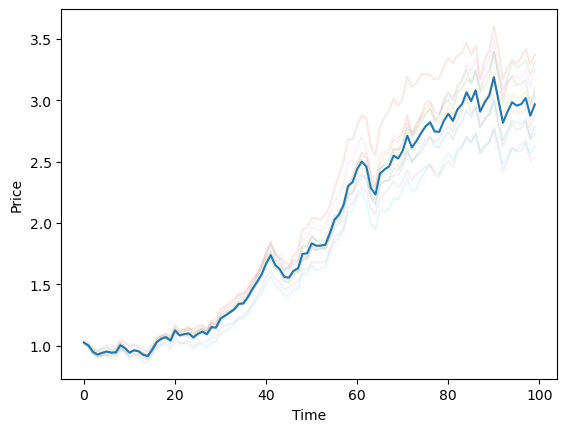

In [7]:
N = 10
returns = np.zeros((N, 100))
assets = np.zeros((N, 100))

#Create Returns 
R_1 = np.random.normal(1.01,0.03,100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)
plt.plot(assets[0], alpha = 0.1)

# Turn the Returns into assets

for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.01, 100)
    returns[i] = R_i
    assets[i] = np.cumprod(R_i)
    
    plt.plot(assets[i], alpha = 0.1)
    
R_P = np.mean(returns, axis = 0)
P = np.mean(assets, axis = 0)
plt.plot(P)
plt.xlabel("Time")
plt.ylabel("Price");

print("Asset Volatilities")
print([np.std(R) for R in returns])
print("Mean Asset Volatility")
print(np.mean([np.std(R) for R in returns]))
print("Portfolio Volatility")
print(np.std(R_P))

Here You can see that all the portfolio is acconpanied by all the assets, the assets being drawn softer. This Portfolio is heavily correlated 
There for is creates the same amount of drawn down. This shows lack of diversity and shows the risk on nature of the portfolio

<h3> Case 3: Investing in Many Uncorrelated Assets</h3>

Asset Volatilities
[0.0, 0.02872055977471525, 0.029409536381951387, 0.03097715062786173, 0.031026388194250413, 0.030193325538447405, 0.029036031265028586, 0.029825565509236495, 0.02998143527263458, 0.03402660365667066]
Mean Asset Volatility
0.02731965962207965
Portfolio Volatility
0.009085437883141428


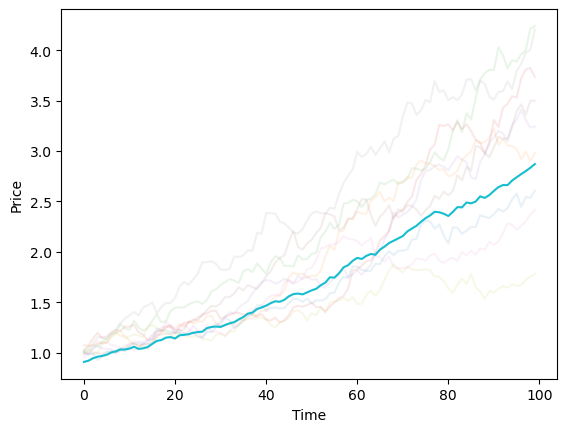

In [8]:
N = 10
returns = np.zeros((N, 100))
assets = np.zeros((N, 100))

# Turn the Returns into assets

for i in range(1, N):
    R_i = np.random.normal(1.01, 0.03, 100)
    returns[i] = R_i
    assets[i] = np.cumprod(R_i)
    
    plt.plot(assets[i], alpha = 0.1)
    
R_P = np.mean(returns, axis = 0)
P = np.mean(assets, axis = 0)
plt.plot(P)
plt.xlabel("Time")
plt.ylabel("Price");

print("Asset Volatilities")
print([np.std(R) for R in returns])
print("Mean Asset Volatility")
print(np.mean([np.std(R) for R in returns]))
print("Portfolio Volatility")
print(np.std(R_P))

Now we see the benefits of diversification. Holding more uncorrelated assets smooths out our portfolio. When one is down, the others are no more
likely to be down, so the bumps both upwards and downwardw are often much smaller. The more assets we hold, the more we'll reduce our volatility 
as well. Let's check that

Text(0, 0.5, 'Uncorrelated Portfolio Volatility')

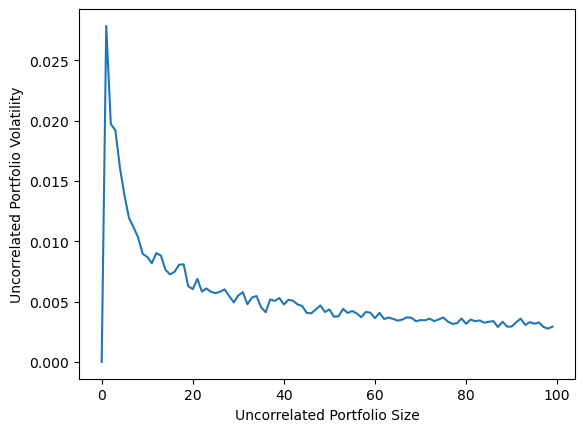

In [9]:
portfolio_volatilities_by_size = np.zeros((100,1))

for N in range(1,100):
    
    assets = np.zeros((N,100))
    returns = np.zeros((N,100))
    
    for i in range(N):
        R_i = np.random.normal(1.01,0.03,100)
        returns[i] = R_i
        
    R_P = np.mean(returns, axis =0)
    
    portfolio_volatilities_by_size[N] = np.std(R_P)
    
plt.plot(portfolio_volatilities_by_size)
plt.xlabel("Uncorrelated Portfolio Size")
plt.ylabel("Uncorrelated Portfolio Volatility")

Interesting enough this shows how the increase in portfolio size causes the Vol to lower as the amount of securites increase. 

<h3> Final Point</h3>
Be invested in as many uncorrelated assets as possible.

In [10]:
stocks = np.array([100,74])

r_12 = 0.20
cov_12 = r_12* 0.05 * 0.08
covariance_matrix = np.array([[0.05**2,cov_12],[cov_12,0.08**2]])

weights = np.array([0.7,0.3])

P = np.dot(weights, stocks.T)

Now we will calulate the overall risk of the porfolio

In [11]:
var_p = np.dot(np.dot(weights, covariance_matrix), weights.T)
sigma_p = np.sqrt(var_p)
print(f"The overall risk of the portfolio is: {sigma_p}")

The overall risk of the portfolio is: 0.04622769732530488
